In [1]:
import numpy as np
import cv2
from scipy.spatial import Delaunay
import random
from matplotlib import pyplot as plt

In [2]:
def show_images(inp_img, out_img):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('../data/out_images/polygon_result.png', img)

In [3]:
def create_low_poly_image(img, num_points=1000, edge_points=100):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height, width = img.shape[:2]
    
    # Generate points for triangulation
    points = []
    
    # Add points along edges
    for _ in range(edge_points):
        points.append([0, random.randint(0, height-1)])
        points.append([width-1, random.randint(0, height-1)])
        points.append([random.randint(0, width-1), 0])
        points.append([random.randint(0, width-1), height-1])
    
    # Add random points
    for _ in range(num_points):
        x = random.randint(0, width-1)
        y = random.randint(0, height-1)
        points.append([x, y])
        
    # Add corner points
    points.append([0, 0])
    points.append([width-1, 0])
    points.append([width-1, height-1])
    points.append([0, height-1])
    
    # Convert points to numpy array
    points = np.array(points)
    
    # Create triangulation
    tri = Delaunay(points)
    
    # Create output image
    output = np.zeros_like(img)
    
    # Draw triangles
    for triangle in tri.simplices:
        pts = points[triangle].astype(np.int32)
        
        # Calculate center point of triangle
        center = pts.mean(axis=0).astype(np.int32)
        
        # Get color at center point
        color = img[center[1], center[0]].tolist()
        
        # Draw filled triangle
        cv2.fillPoly(output, [pts], color)
    
    return output

In [4]:
image = cv2.imread('../data/inp_images/tower.jpeg')
result = create_low_poly_image(image)

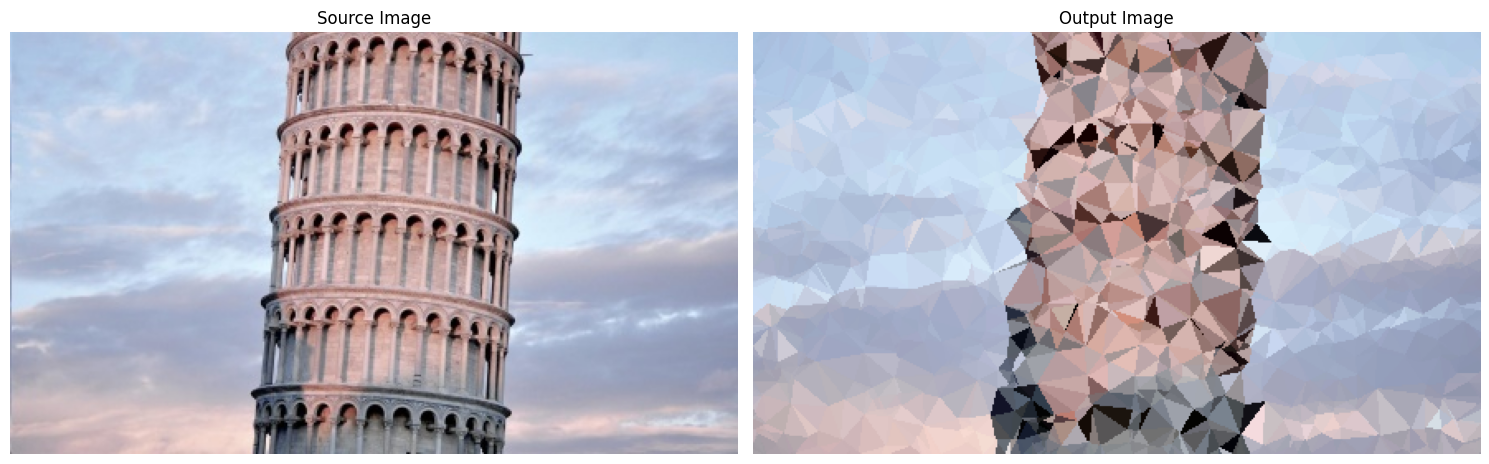

In [5]:
show_images(image, result)
save_image(result)